In [2]:
import glob
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
train_path = "/home/aicontest/env/data/train"
test_path = "/home/aicontest/env/data/test"
unlabeled_path = "/home/aicontest/env/data/unlabeled_data"

In [4]:
train_files = glob.glob(train_path + "/*.ogg")
test_files = glob.glob(test_path + "/*.ogg")
unlabeled_files = glob.glob(unlabeled_path + "/*.ogg")

print("* Train data size:", len(train_files))
print("* Test data size:", len(test_files))
print("* Unlabeled data size:", len(unlabeled_files))

* Train data size: 55438
* Test data size: 50000
* Unlabeled data size: 1264


In [5]:
def audio_lengths(files):
    sampling_rates = []
    audio_lengths = []

    for audio_file in tqdm(files):
        y, sr = librosa.load(audio_file, sr=None)
        audio_len = librosa.get_duration(y=y, sr=sr)

        sampling_rates.append(sr)
        audio_lengths.append(audio_len)

    return sampling_rates, audio_lengths

In [6]:
train_sr, train_duration = audio_lengths(train_files)
test_sr, test_duration = audio_lengths(test_files)
unlabeled_sr, unlabeled_duration = audio_lengths(unlabeled_files)

  0%|          | 0/55438 [00:00<?, ?it/s]

100%|██████████| 1264/1264 [00:04<00:00, 300.50it/s]


In [7]:
def plot_analysis(durations, mode):
    mean_d = np.mean(durations)
    max_d = np.max(durations)
    min_d = np.min(durations)

    print ("* Mean duration:", mean_d)
    print ("* Max duration:", max_d)
    print ("* Min duration:", min_d)

    # 데이터의 히스토그램을 사용하여 분포 시각화
    plt.hist(durations, bins=50, alpha=0.7, color='royalblue', edgecolor='black')

    # 평균, 최소, 최대 값을 그래프에 표시
    plt.axvline(mean_d, color='tomato', linestyle='dashed', linewidth=1, label=f'Mean: {mean_d:.2f}')
    plt.axvline(min_d, color='green', linestyle='dashed', linewidth=1, label=f'Min: {min_d}')
    plt.axvline(max_d, color='purple', linestyle='dashed', linewidth=1, label=f'Max: {max_d}')

    # 그래프 설정
    plt.title(f"{mode} duration")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Num audios")
    plt.legend()
    plt.show()

* Mean duration: 3.099863215438869
* Max duration: 38.6834375
* Min duration: 0.105625


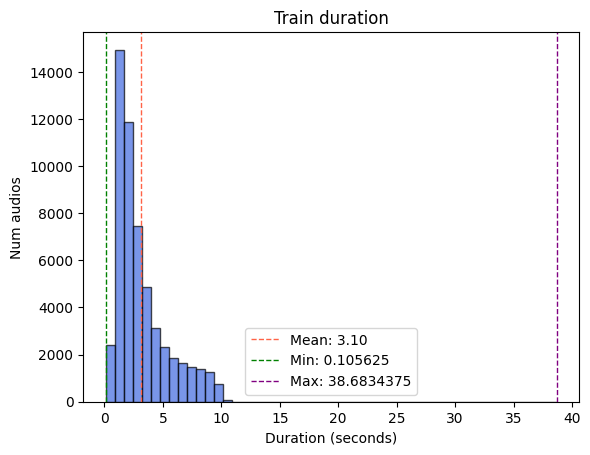

In [9]:
plot_analysis(train_duration, mode="Train")

* Mean duration: 5.0
* Max duration: 5.0
* Min duration: 5.0


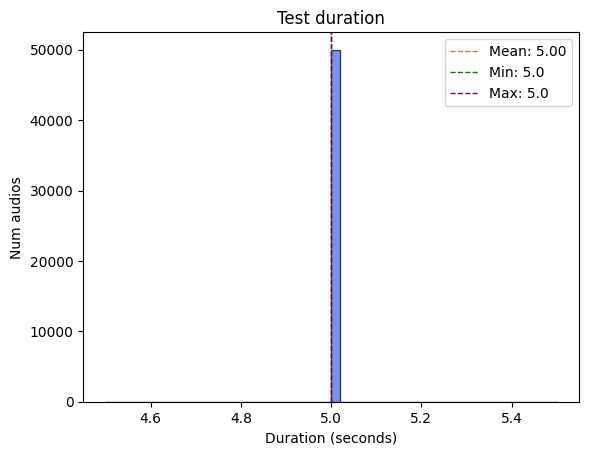

In [10]:
plot_analysis(test_duration, mode="Test")

* Mean duration: 5.0
* Max duration: 5.0
* Min duration: 5.0


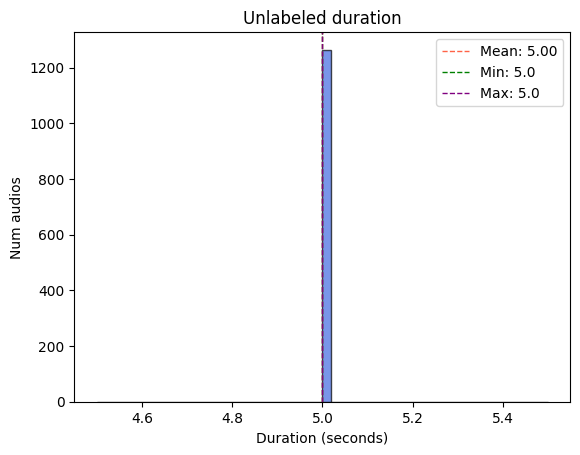

In [11]:
plot_analysis(unlabeled_duration, mode="Unlabeled")